eigenvalues [np.float64(-0.95125), np.float64(-0.80125), np.float64(-0.5524999999999999), np.float64(-0.20249999999999985), np.float64(0.24500000000000022), np.float64(0.7937500000000004), np.float64(1.4412500000000006), np.float64(2.189999999999999), np.float64(3.0362499999999972)]
1.4098897453635408
1.416618965508136
1.4168846683830851
1.417707978303544
1.41740415090784
1.4175992366418144
1.4175785145415842
1.4177097421133569
1.4176446960677862


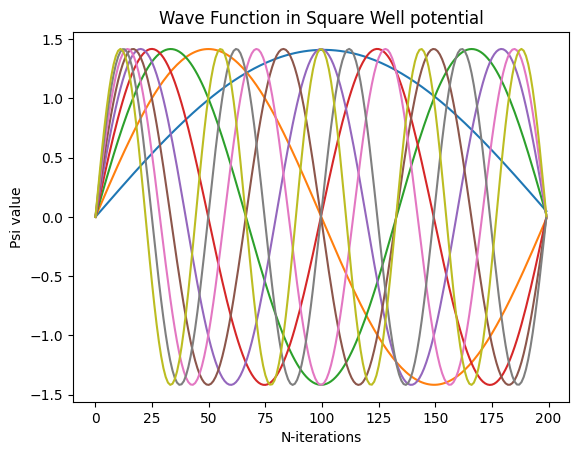

ΔxΔp is  0.5678385402634384
ΔxΔp is  1.670220301972818
ΔxΔp is  2.6269591212946617
ΔxΔp is  3.557425711348502
ΔxΔp is  4.4778673132439195
ΔxΔp is  5.393248351202095
ΔxΔp is  6.305596168102051
ΔxΔp is  7.215876134869013
ΔxΔp is  8.124600071648365


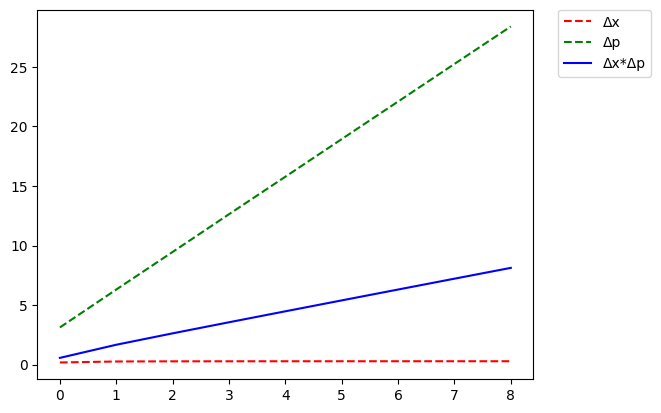

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import simpson

N=200

potential = np.zeros(N)-1

gamma_sqrd = 200

l = 1/N
psi=np.zeros(N)
psi[0]=0 
psi[1] = 1e-4


def psi_array(eps):
    k_sqrd = gamma_sqrd *( eps - potential) 
    n=1
    while (n < N-1):
        psi[n+1] = (2*(1-5/12 * l**2 * k_sqrd[n])*psi[n] - (1 + 1/12 * l**2 * k_sqrd[n-1])*psi[n-1])/(1+1/12*l**2*k_sqrd[n+1])
        #psi[n+1] = psi[n] + 1
        n+=1
    return psi

"""#part2"""


def find_eigen(eps,tol):

    delta_eps = 0.01 
    while abs(delta_eps)>tol:
        sign_change = psi_array(eps)[N-1] * psi_array(eps+ delta_eps)[N-1]
        eps+=delta_eps
        if sign_change<0:  
            #print("less than 0: ", sign_change, "delta_eps is: ", delta_eps, "epsilon is: ", eps)
            delta_eps = -delta_eps / 2
    return eps

tol = 0.001

v_pot = np.arange(-1,4,0.15)
#print(v_pot)

temp =[]

for i in range(len(v_pot)):
    temp.append(find_eigen(v_pot[i],tol))
    
eigenvalues =[]
for i in range(len(temp)-1):
    if abs(temp[i+1] - temp[i]) >0.1:
        eigenvalues.append(temp[i])
        

print("eigenvalues" , eigenvalues)
#part 3

def psi_norm(eps):
    psi_norm = psi_array(eps)/(np.sqrt(simpson(psi**2,dx=l)))
    return psi_norm


 
for i in range(len(eigenvalues)):
    plt.plot(psi_norm(eigenvalues[i]))
    print(max(psi_norm(eigenvalues[i])))




plt.title("Wave Function in Square Well potential")
plt.xlabel("N-iterations")
plt.ylabel("Psi value")
plt.show()




#Part 4

l=1/(N)

def psi_pp(eps):
    psi = psi_norm(eps)
    
    psi_pp = np.zeros(N)
    for n in range(N-1):
        if n !=0:
            if n != N-1:
                psi_pp[n] = (psi[n-1] - 2*psi[n] + psi[n+1]) /(l**2)
        
    return psi_pp




#plt.plot(psi_pp_analytic(eigenvalues[0]))
def delp(eps):
    delp = np.sqrt( -1*simpson(psi_norm(eps)*psi_pp(eps), dx = l))
    return delp
   
x = np.arange(0,1,l)

def delx(eps):
    delx = np.sqrt( simpson(x**2 * psi_norm(eps)**2,dx=l) - (simpson(x*psi_norm(eps)**2,dx=l)**2))
    return delx

# print("Δp is " , delp(eigenvalues[0]))
# print("Δx is " , delx(eigenvalues[0]))
# print("ΔxdΔp is " , delx(eigenvalues[0])*delp(eigenvalues[0]))

delx_arr=[]
delp_arr=[]
delxp_arr =[]

for i in range(len(eigenvalues)):
    print("ΔxΔp is " , delx(eigenvalues[i])*delp(eigenvalues[i]))
    delx_arr.append(delx(eigenvalues[i]))
    delp_arr.append(delp(eigenvalues[i]))
    delxp_arr.append( delx(eigenvalues[i])*delp(eigenvalues[i]))
    
    
plt.plot(delx_arr, 'r--', label='Δx')
plt.plot(delp_arr,  'g--', label='Δp')
plt.plot(delxp_arr,  'b', label='Δx*Δp')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()

In [ ]:
print()